# GAN

# BERT Transformer Model

# Time series forecasting using transformer model

In [2]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
from dataclasses import dataclass
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import ttest_ind
import requests
import pandas as pd
import json
import helper_functions

In [3]:
number_of_days=1000

#Treatment pools
#treatment_pool_id="0x4a5a2a152e985078e1a4aa9c3362c412b7dd0a86"  #wstETH/WETH 0.05%
#treatment_pool_id="0x1c3140ab59d6caf9fa7459c6f83d4b52ba881d36" #OP/USDC 0.3%
#treatment_pool_id="0xbf16ef186e715668aa29cef57e2fd7f9d48adfe6" #USDC/DAI 0.01%
treatment_pool_id="0x03af20bdaaffb4cc0a521796a223f7d85e2aac31" #WETH/DAI 0.3%
treatment_url="https://api.thegraph.com/subgraphs/name/ianlapham/optimism-post-regenesis"

#Control pools
#control_pool_id="0xd340b57aacdd10f96fc1cf10e15921936f41e29c" #wstETH/ETH 0.05% on ETH
#control_pool_id="0x68f5c0a2de713a54991e01858fd27a3832401849" #WETH/OP 0.3%
#control_pool_id="0xf1f199342687a7d78bcc16fce79fa2665ef870e1" #USDC/USDT 0.01% 
control_pool_id="0x85149247691df622eaf1a8bd0cafd40bc45154a9"  #WETH/USDC 0.05%
control_url="https://api.thegraph.com/subgraphs/name/ianlapham/optimism-post-regenesis"
#control_url="https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v3"

# Define Incentive and sample periods

uniswap_data = helper_functions.get_uniswap_data(treatment_pool_id,number_of_days,treatment_url)
treatment_df = pd.DataFrame(uniswap_data)
treatment_df=helper_functions.preprocess_data(treatment_df)

uniswap_data = helper_functions.get_uniswap_data(control_pool_id,number_of_days,control_url)
control_df = pd.DataFrame(uniswap_data)
control_df=helper_functions.preprocess_data(control_df)

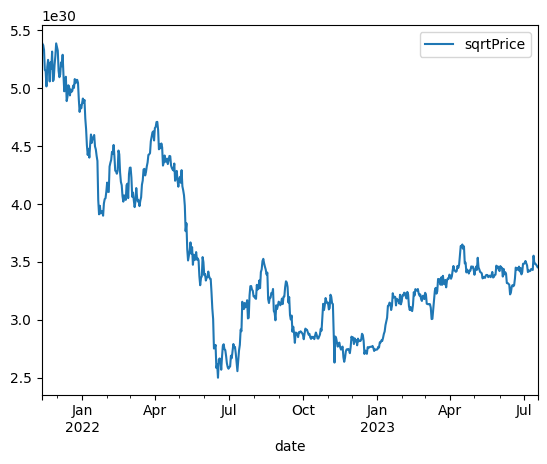

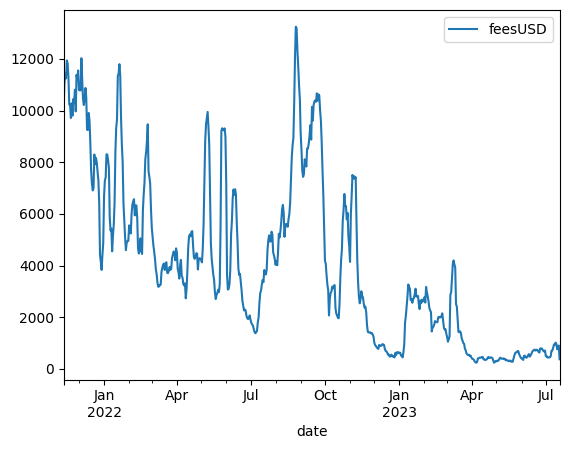

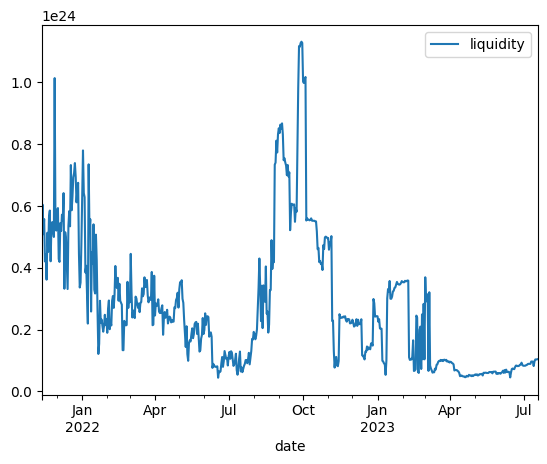

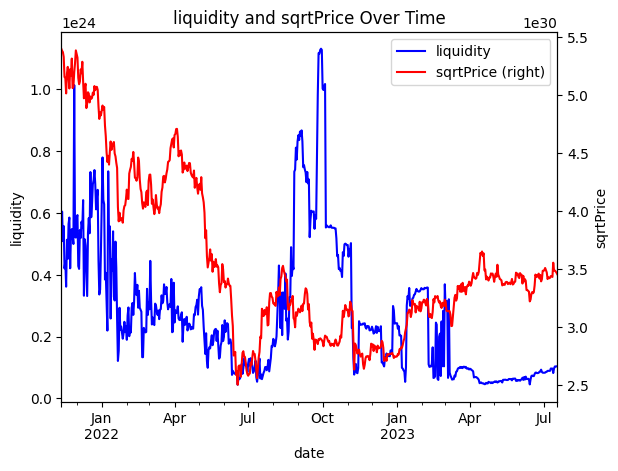

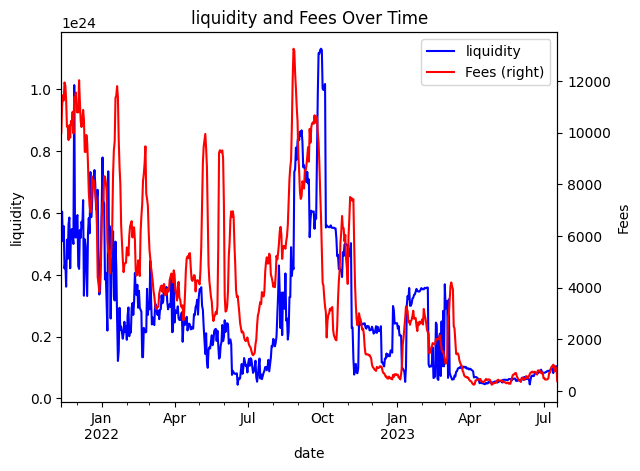

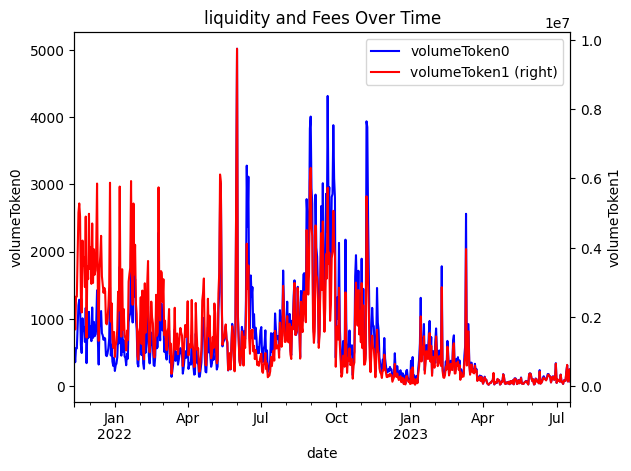

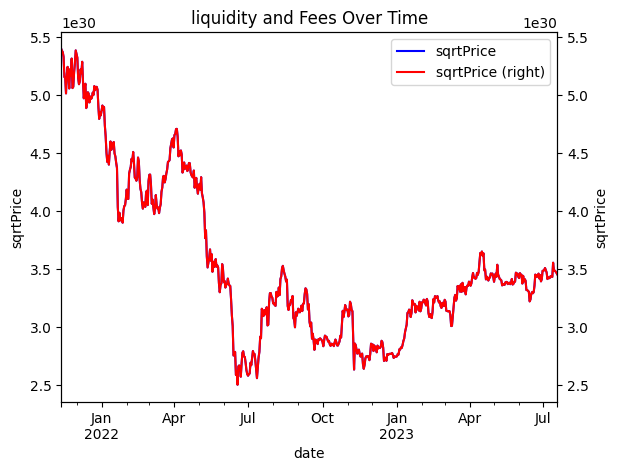

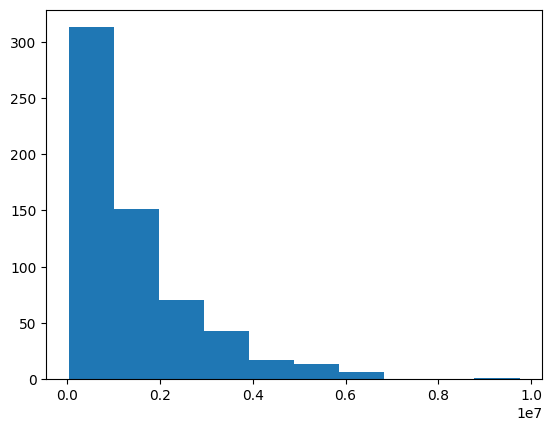

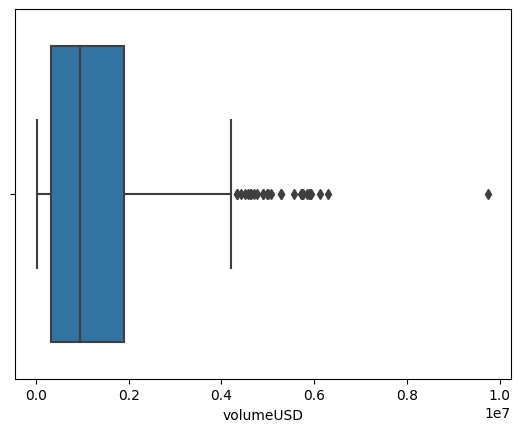

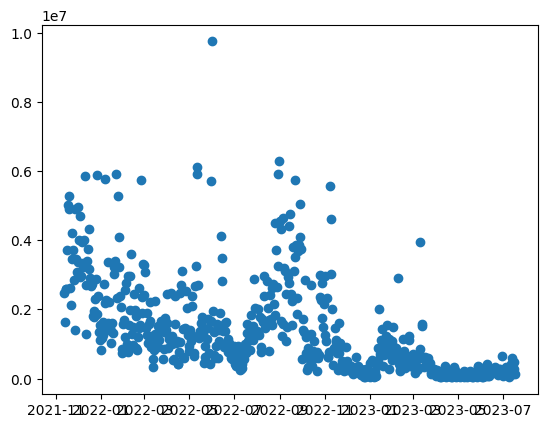

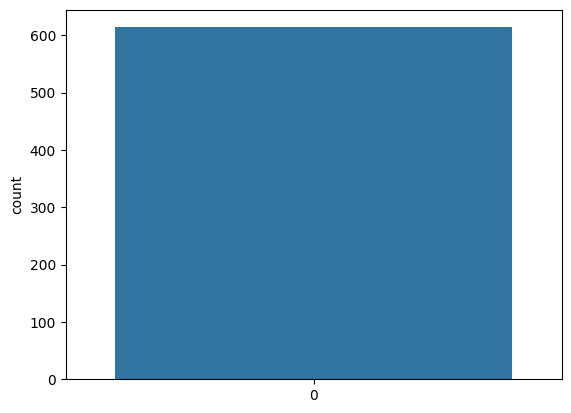

c:\Users\hijaz tr\Desktop\cadCADProject1\helper_functions.py:121: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


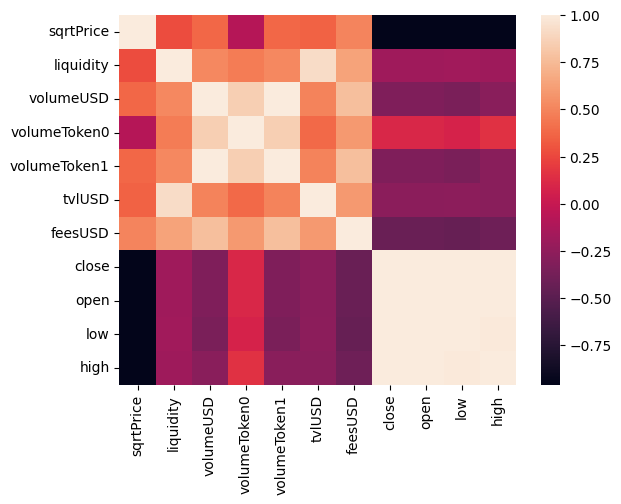

c:\Users\hijaz tr\Desktop\cadCADProject1\helper_functions.py:123: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


          date   tick     sqrtPrice     liquidity     volumeUSD  volumeToken0  \
252 2022-11-08  71995  2.898396e+30  1.299545e+23  5.556847e+06   3936.727680   
300 2022-09-21  71306  2.800225e+30  5.486243e+23  5.732898e+06   4314.113217   
321 2022-08-31  73467  3.119746e+30  8.312716e+23  6.305448e+06   4007.282338   
322 2022-08-30  73288  3.092064e+30  7.728470e+23  5.907542e+06   3826.857462   
412 2022-06-01  75095  3.384393e+30  1.988469e+23  9.749704e+06   5016.739633   
413 2022-05-31  75746  3.496390e+30  1.856111e+23  5.720300e+06   2921.765397   
432 2022-05-12  75830  3.510953e+30  9.898436e+22  5.905769e+06   3014.083848   
433 2022-05-11  76379  3.608697e+30  1.206082e+23  6.117442e+06   2729.053342   
509 2022-02-24  78604  4.033307e+30  2.134584e+23  5.742182e+06   2281.299782   
543 2022-01-21  78599  4.032351e+30  1.211577e+23  5.928442e+06   2124.729079   
557 2022-01-07  80803  4.502206e+30  3.162811e+23  5.764632e+06   1773.305651   
569 2021-12-26  83176  5.069

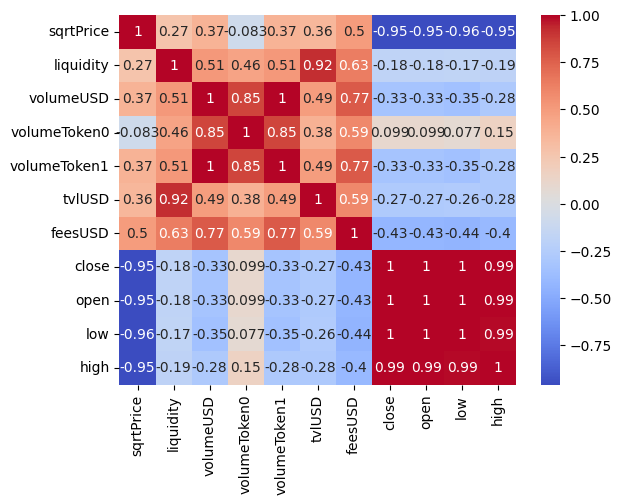

In [3]:
done=helper_functions.explore_data(treatment_df)

In [4]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the generator model
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(input_dim,)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(output_dim, activation='tanh'))
    return model

# Define the discriminator model
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(128, activation='relu', input_shape=(output_dim,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

# Define the GAN model
def make_gan_model(generator, discriminator):
    model = tf.keras.Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

# Define the loss function
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

# Define the discriminator loss function
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

# Define the generator loss function
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

# Define the optimizer
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

# Define the training loop
@tf.function
def train_step(real_data, generator, discriminator):
    # Generate random noise
    noise = tf.random.normal([batch_size, input_dim])

    # Generate fake data using the generator
    generated_data = generator(noise, training=True)

    # Train the discriminator
    with tf.GradientTape() as disc_tape:
        real_output = discriminator(real_data, training=True)
        fake_output = discriminator(generated_data, training=True)
        disc_loss = discriminator_loss(real_output, fake_output)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    # Train the generator
    with tf.GradientTape() as gen_tape:
        fake_output = discriminator(generated_data, training=True)
        gen_loss = generator_loss(fake_output)
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))

# Define the training function
def train(generator, discriminator, dataset, epochs):
    for epoch in range(epochs):
        for batch in dataset:
            train_step(batch, generator, discriminator)
        # Print the progress every 10 epochs
        if epoch % 10 == 0:
            print(f"Epoch {epoch}/{epochs}")

# Set the input and output dimensions
input_dim = ...  # Specify the input dimension based on your data
output_dim = ...  # Specify the output dimension based on your data

# Set the batch size and number of epochs
batch_size = ...
num_epochs = ...

# Create the generator and discriminator models
generator = make_generator_model()
discriminator = make_discriminator_model()

# Create the GAN model
gan_model = make_gan_model(generator, discriminator)

# Prepare the data for training (reshape, normalize, etc.)
# ...

# Create a TensorFlow dataset from your preprocessed data
dataset = tf.data.Dataset.from_tensor_slices(preprocessed_data).shuffle(buffer_size).batch(batch_size)

# Train the GAN model
train(generator, discriminator, dataset, num_epochs)


TypeError: Dimension value must be integer or None or have an __index__ method, got value 'Ellipsis' with type '<class 'ellipsis'>'

In [4]:
from sklearn.preprocessing import MinMaxScaler

# Select the columns we're interested in
data = treatment_df[['sqrtPrice', 'volumeUSD', 'tvlUSD']]

# Scale the data to be between 0 and 1
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [5]:
def create_sequences(data, seq_length):
    xs = []
    ys = []

    for i in range(len(data)-seq_length-1):
        x = data[i:(i+seq_length)]
        y = data[i+seq_length, 0]
        xs.append(x)
        ys.append(y)

    return np.array(xs), np.array(ys)

seq_length = 30  # Number of past days of data we want to use to predict the next day
X, y = create_sequences(data_scaled, seq_length)

# Split data into training and testing sets
train_size = int(0.9 * len(X))
X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(524, 30, 3)
(59, 30, 3)
(524,)
(59,)


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, TimeDistributed

model = Sequential()

model.add(
    tf.keras.layers.Dense(64, activation="relu", input_shape=(X_train.shape[1], X_train.shape[2]))
)
model.add(tf.keras.layers.Dense(30, activation="relu"))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer='adam', loss='mse')


In [7]:

model.fit(
    X_train, 
    y_train,
    epochs=10,
    validation_data=(X_test, y_test),
)
y_predicted = model.predict(X_test)



Epoch 1/10
17/17 [==============================] - 2s 23ms/step - loss: 0.0570 - val_loss: 0.0868
Epoch 2/10
17/17 [==============================] - 0s 6ms/step - loss: 0.0424 - val_loss: 0.2400
Epoch 3/10
17/17 [==============================] - 0s 7ms/step - loss: 0.0392 - val_loss: 0.2052
Epoch 4/10
17/17 [==============================] - 0s 7ms/step - loss: 0.0370 - val_loss: 0.2893
Epoch 5/10
17/17 [==============================] - 0s 6ms/step - loss: 0.0364 - val_loss: 0.2914
Epoch 6/10
17/17 [==============================] - 0s 7ms/step - loss: 0.0362 - val_loss: 0.2764
Epoch 7/10
17/17 [==============================] - 0s 7ms/step - loss: 0.0365 - val_loss: 0.3183
Epoch 8/10
17/17 [==============================] - 0s 8ms/step - loss: 0.0365 - val_loss: 0.2623
Epoch 9/10
17/17 [==============================] - 0s 9ms/step - loss: 0.0363 - val_loss: 0.2988
Epoch 10/10
2/2 [==============================] - 0s 4ms/step


In [10]:
y_predicted_3d = np.array(y_predicted)  # this should be replaced with your actual 3D array

# get the shape of the 3D array
d1, d2, d3 = y_predicted_3d.shape

# reshape to 2D array
y_predicted_2d = np.reshape(y_predicted_3d, (d1, d2*d3))
print(y_predicted.shape)
prediction=pd.DataFrame(y_predicted_2d)
prediction

(59, 30, 1)


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.299270,0.298381,0.304749,0.302076,0.298508,0.300124,0.289441,0.293034,0.291008,0.289540,...,0.300442,0.304549,0.301440,0.301847,0.303704,0.307812,0.303622,0.301577,0.296919,0.299888
1,0.298381,0.304749,0.302076,0.298508,0.300124,0.289441,0.293034,0.291008,0.289540,0.289968,...,0.304549,0.301440,0.301847,0.303704,0.307812,0.303622,0.301577,0.296919,0.299888,0.293787
2,0.304749,0.302076,0.298508,0.300124,0.289441,0.293034,0.291008,0.289540,0.289968,0.289625,...,0.301440,0.301847,0.303704,0.307812,0.303622,0.301577,0.296919,0.299888,0.293787,0.304686
3,0.302076,0.298508,0.300124,0.289441,0.293034,0.291008,0.289540,0.289968,0.289625,0.291350,...,0.301847,0.303704,0.307812,0.303622,0.301577,0.296919,0.299888,0.293787,0.304686,0.289626
4,0.298508,0.300124,0.289441,0.293034,0.291008,0.289540,0.289968,0.289625,0.291350,0.294101,...,0.303704,0.307812,0.303622,0.301577,0.296919,0.299888,0.293787,0.304686,0.289626,0.313165
5,0.300124,0.289441,0.293034,0.291008,0.289540,0.289968,0.289625,0.291350,0.294101,0.302248,...,0.307812,0.303622,0.301577,0.296919,0.299888,0.293787,0.304686,0.289626,0.313165,0.306776
6,0.289441,0.293034,0.291008,0.289540,0.289968,0.289625,0.291350,0.294101,0.302248,0.297381,...,0.303622,0.301577,0.296919,0.299888,0.293787,0.304686,0.289626,0.313165,0.306776,0.302454
7,0.293034,0.291008,0.289540,0.289968,0.289625,0.291350,0.294101,0.302248,0.297381,0.303658,...,0.301577,0.296919,0.299888,0.293787,0.304686,0.289626,0.313165,0.306776,0.302454,0.331456
8,0.291008,0.289540,0.289968,0.289625,0.291350,0.294101,0.302248,0.297381,0.303658,0.290376,...,0.296919,0.299888,0.293787,0.304686,0.289626,0.313165,0.306776,0.302454,0.331456,0.336775
9,0.289540,0.289968,0.289625,0.291350,0.294101,0.302248,0.297381,0.303658,0.290376,0.296639,...,0.299888,0.293787,0.304686,0.289626,0.313165,0.306776,0.302454,0.331456,0.336775,0.339463


Average end balance after 30 days: -8946.967330369398


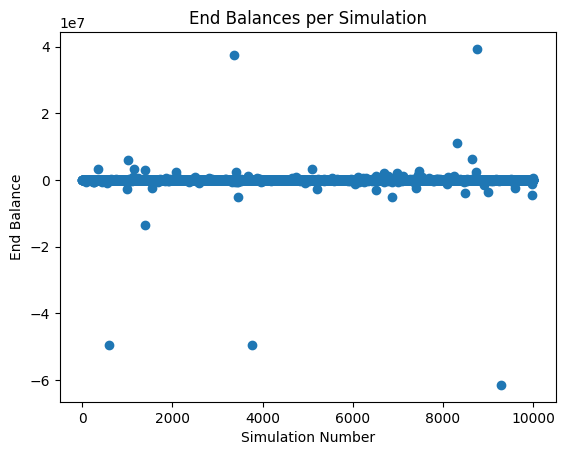

In [11]:
import numpy as np

# Define parameters
n_simulations = 10000
n_days = 30
initial_stake = 1000
daily_return_rate = 0.01  # Assume a daily return of 1%

# Initialize an array to store the results
end_balances = np.zeros(n_simulations)

# Run the simulations
for i in range(n_simulations):
    daily_returns = np.random.normal(loc=daily_return_rate, size=n_days)
    end_balance = initial_stake * np.prod(1 + daily_returns)
    end_balances[i] = end_balance

# Calculate the average end balance
average_end_balance = np.mean(end_balances)

print(f"Average end balance after {n_days} days: {average_end_balance}")
plt.scatter(range(1, len(end_balances) + 1), end_balances)
plt.xlabel('Simulation Number')
plt.ylabel('End Balance')
plt.title('End Balances per Simulation')
plt.show()

